In [1]:
import numpy as np
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import os
from ProjectF import MLAData,classification, Object,storing
import random

In [2]:
## Loading in data
PlateDir = os.path.normpath("D:\Data\Plate_Name.txt")
with open(PlateDir) as f:
    Spectra_Files = f.read().splitlines()

In [3]:
PLATEIDs = []
BinInfos = []
Flux = []
MJDs = []
log_wavst=[]
TrainingDir = os.path.normpath("D:\Data")
TrainingFolder =  os.path.normpath("\Training")
slash =  os.path.normpath("\\")
for spectrum in Spectra_Files:
    plate_ = fits.open( TrainingDir +TrainingFolder+slash+ spectrum ,memmap=True)
    Bin_info_ = plate_[5].data
    Flux_ = plate_[0].data
    primhdu_ = plate_[0]
    PLATEIDs.append(primhdu_.header['PLATEID'])
    log_wavst.append(primhdu_.header['COEFF0'])
    MJDs.append(primhdu_.header['MJD'])
    BinInfos.append(Bin_info_)
    Flux.append(Flux_)
    

In [4]:
list = fits.open(TrainingDir+slash+'Superset_DR12Q.fits',memmap=True)#opening file

supers=list[1].data # storing  BINTABLE extension data

In [5]:
Full_Data = storing(PLATEIDs,supers)

In [6]:
len(BinInfos)

100

In [7]:
X,Y,Train_z, Train_mag,wavst = MLAData(Full_Data,BinInfos,Flux, log_wavst)

In [8]:
TestPlateDir = os.path.normpath("D:\Data\TestPlate_Name.txt")
with open(TestPlateDir) as f:
    Spectra_TestFiles = f.read().splitlines()
Spectra_TestFiles

['spPlate-4791-55889.fits',
 'spPlate-6970-56444.fits',
 'spPlate-5852-56034.fits',
 'spPlate-5484-56039.fits',
 'spPlate-6290-56238.fits',
 'spPlate-5656-55940.fits',
 'spPlate-6122-56246.fits',
 'spPlate-6424-56272.fits',
 'spPlate-6723-56428.fits',
 'spPlate-6880-56543.fits']

In [9]:
TrainingDir = os.path.normpath("D:\Data")
TestingFolder =  os.path.normpath("\Test")
PLATEIDs_test = []
log_wavs=[]
BinInfos_test = []
Flux_test = []
z=0
for spectrum_test in Spectra_TestFiles:
    plate_test = fits.open(TrainingDir +TestingFolder+slash+spectrum_test ,memmap=True)
    Bin_info_test = plate_test[5].data
    Flux_t = plate_test[0].data
    primhdu_test = plate_test[0]
    PLATEIDs_test.append(primhdu_test.header['PLATEID'])
    log_wavs.append(primhdu_test.header['COEFF0'])
    BinInfos_test.append(Bin_info_test)
    Flux_test.append(Flux_t)


In [10]:
Full_Data_test = storing(PLATEIDs_test,supers)

In [11]:
X_test,Y_test,All_redshifts,All_Mag,wav_logs= MLAData(Full_Data_test,BinInfos_test,Flux_test,log_wavs)

Solvers: ‘lbfgs’ is an optimizer in the family of quasi-Newton methods. ‘sgd’ refers to stochastic gradient descent. ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

In [12]:
hiddenlayer_format = (13)
backprop_method = 'lbfgs'
lr=0.00001
act =  'tanh' #'logistic'
mlp = MLPClassifier(hidden_layer_sizes=hiddenlayer_format,max_iter=500, solver = backprop_method,learning_rate_init=lr,activation=act) ##Think About

In [13]:
scaler = StandardScaler()  
scaler.fit(X)  
X = scaler.transform(X)  
X_test = scaler.transform(X_test)  

mlp.fit(X,Y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=13, learning_rate='constant',
       learning_rate_init=1e-05, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [14]:
predictions = mlp.predict(np.array(X_test))

In [15]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          1       0.92      0.91      0.91       856
          3       0.79      0.76      0.77       502
          4       0.35      0.35      0.35        68
         30       0.87      0.90      0.88       818

avg / total       0.86      0.86      0.86      2244



In [16]:
star,star_starloc,star_lowzloc,star_galloc,star_highzloc = classification(1,Y_test,predictions) 
lowz,lowz_starloc,lowz_loc,lowz_galloc,lowz_highzloc = classification(3,Y_test,predictions)
gal,gal_starloc,gal_lowzloc,gal_galloc,gal_highzloc = classification(4,Y_test,predictions)
highz,highz_starloc,highz_lowzloc,highz_galloc,highz_highzloc = classification(30,Y_test,predictions)

In [17]:
File_Name = input("Please Enter File name: ")

Please Enter File name: 13.11.17_4


In [18]:
d = open(TrainingDir+slash+File_Name+".txt", 'w')

In [19]:
t1=["Files used to train: ",np.str(Spectra_Files), "\n"]
sp= "\n"
t2 = ["Files used to test: ",np.str(Spectra_TestFiles), "\n"]
t3 = ["Number of training objects = ",np.str(len(Spectra_Files)), "\n"]
t4 = ["Number of testing objects = ",np.str(len(Spectra_TestFiles)), "\n"]
n1 = ["Structure of neural network: ", np.str(hiddenlayer_format),"\n"]
n2  = ["Backpropagation method used: ",np.str(backprop_method), "\n"]
n3  = ["Learning rate: ",np.str(lr), "\n"]
n4  = ["Activation Function: ",np.str(act), "\n"]
r1 = ["Results of Neural Network: ", "\n","\n"]
r2=["        ","       Star    Quasar  Galaxy  BAL ","\n",]
r3="Star           ",np.str(np.round(star[0]*100,2)),"%  ", np.str(np.round(star[1]*100,2)),"%  ",np.str(np.round(star[2]*100,2)),"%  ",np.str(np.round(star[3]*100,2)),"%","\n"
r4="Quasar z<2.1   ",np.str(np.round( lowz[0]*100,2)),"%  ", np.str(np.round( lowz[1]*100,2)),"%  ",np.str(np.round( lowz[2]*100,2)),"%  ",np.str(np.round( lowz[3]*100,2)),"%","\n"
r5="Galaxy         ",np.str(np.round( gal[0]*100,2)),"%  ", np.str(np.round( gal[1]*100,2)),"%  ",np.str(np.round( gal[2]*100,2)),"%  ",np.str(np.round( gal[3]*100,2)),"%","\n"
r6="Quasar z<2.1   ",np.str(np.round( highz[0]*100,2)),"%  ", np.str(np.round( highz[1]*100,2)),"%  ",np.str(np.round( highz[2]*100,2)),"%  ",np.str(np.round (highz[3]*100,2)),"%","\n"

In [20]:
d.writelines(t1)
d.writelines(sp)
d.writelines(t2)
d.writelines(sp)
d.writelines(t3)
d.writelines(t4)
d.writelines(sp)
d.writelines(sp)
d.writelines(n1)
d.writelines(n2)
d.writelines(n3)
d.writelines(n4)
d.writelines(sp)
d.writelines(sp)
d.writelines(r1)
d.writelines(r2)
d.writelines(r3)
d.writelines(r4)
d.writelines(r5)
d.writelines(r6)


In [21]:
list.close()

In [22]:
d.close()

In [23]:
misclass_highz1= random.choice(highz_starloc)
misclass_highz2= random.choice(highz_galloc)
misclass_star= random.choice(star_highzloc)
misclass_gal= random.choice(gal_highzloc)

From (http://www.sdss.org/dr12/spectro/spectro_basics/) : 'About the Spectra', we  know:


<h5><center>log($\lambda_{i+1}$) - log($\lambda_{i}$)=0.0001.</center></h5>

I will use this, and the first pixels central wavelength, to produce the wavelength array for this plate. This will be done by finding the plate wavelength ratio: 

<h3><center>$\frac{\lambda_{i+1}}{\lambda_{i}}= 10^{0.0001}$.</center></h3>


In [30]:
wav_ratio = 10**0.0001
append_count=0
cent_wav = 10**wav_logs[misclass_highz1]
Y_flux = X_test[misclass_highz1]
wavelengths = []
wavelengths.append(cent_wav)
current_wav = cent_wav
while append_count < len(Y_flux)-1:
    current_wav = current_wav*wav_ratio
    wavelengths.append(current_wav)
    append_count=append_count+1

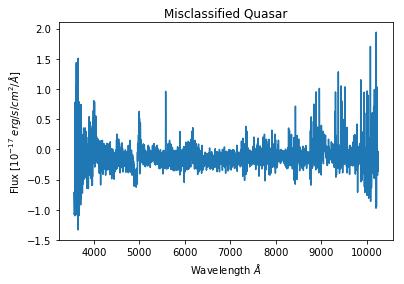

In [31]:
plt.plot(wavelengths,Y_flux)
plt.ylabel('Flux [$10^{-17}$ $erg/s/cm^2/$'r'$\AA$'']')
plt.xlabel('Wavelength' r' $\AA$')
plt.title('Misclassified Quasar')
plt.show()

In [37]:
append_count=0
cent_wav2 = 10**wav_logs[misclass_highz2]
Y2_flux = X_test[misclass_highz2]
wavelengths2 = []
wavelengths2.append(cent_wav2)
current_wav2 = cent_wav2
while append_count < len(Y2_flux)-1:
    current_wav2 = current_wav2*wav_ratio
    wavelengths2.append(current_wav2)
    append_count=append_count+1

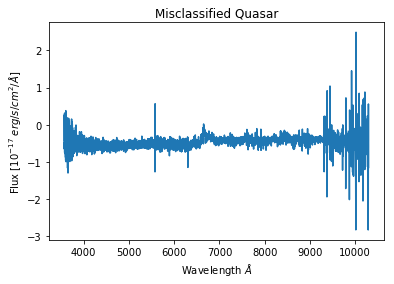

In [38]:
plt.plot(wavelengths2,Y2_flux)
plt.ylabel('Flux [$10^{-17}$ $erg/s/cm^2/$'r'$\AA$'']')
plt.xlabel('Wavelength' r' $\AA$')
plt.title('Misclassified Quasar')
plt.show()

In [43]:
append_count=0
cent_wav3 = 10**wav_logs[misclass_star]
Y3_flux = X_test[misclass_star]
wavelengths3 = []
wavelengths3.append(cent_wav)
current_wav3 = cent_wav3
while append_count < len(Y3_flux)-1:
    current_wav3 = current_wav3*wav_ratio
    wavelengths3.append(current_wav3)
    append_count=append_count+1

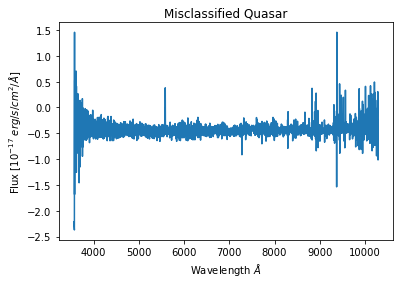

In [45]:
plt.plot(wavelengths3,Y3_flux)
plt.ylabel('Flux [$10^{-17}$ $erg/s/cm^2/$'r'$\AA$'']')
plt.xlabel('Wavelength' r' $\AA$')
plt.title('Misclassified Quasar')
plt.show()

In [48]:
append_count=0
cent_wav4 = 10**wav_logs[misclass_gal]
Y4_flux = X_test[misclass_gal]
wavelengths4 = []
wavelengths4.append(cent_wav4)
current_wav4 = cent_wav4
while append_count < len(Y4_flux)-1:
    current_wav4 = current_wav4*wav_ratio
    wavelengths4.append(current_wav4)
    append_count=append_count+1

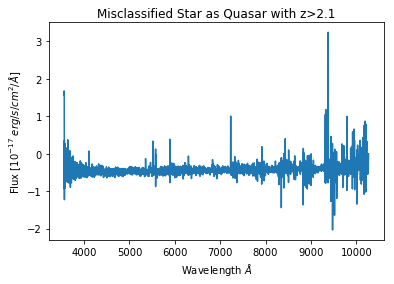

In [49]:
plt.plot(wavelengths4,Y4_flux)
plt.ylabel('Flux [$10^{-17}$ $erg/s/cm^2/$'r'$\AA$'']')
plt.xlabel('Wavelength' r' $\AA$')
plt.title('Misclassified Star as Quasar with z>2.1')
plt.show()